# Differential Expression
AnnSQL offers simple access to the `calculate_differential_expression` method which performs differential expression between two groups of cells byway of a ttest. The results are stored in the  `diff_expression` table which may be queried for results. Alternatively, the `plot_differential_expression` method provides a convenient way to produce a volcano plot of differential expression results.

##  Load AnnSQL

In [1]:
from AnnSQL import AnnSQL

## Open the AnnSQL Database

In [3]:
asql = AnnSQL(db="../examples/db/PCCM.asql")

## Take a look at the obs table

In [6]:
asql.query("SELECT * FROM obs LIMIT 10")

,cell_id,infection_count,infected,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,doublet_score,predicted_doublets,n_counts,clusters,leiden_clusters,cell_type
0,TTACCGCGTGACCTGC,91,True,7586,18685.0,0.0,0.0,0.255172,False,39993.0,0,4,Glutamatergic
1,CATGCTCCACACGCCA,201,True,7314,19723.0,0.0,0.0,0.119374,False,39960.0,0,1,Glutamatergic
2,ATTGTTCAGGTCGTAG,78,True,7333,18472.0,0.0,0.0,0.081917,False,39142.0,0,4,Glutamatergic
3,TGAATCGCATCGAACT,28,True,7562,19875.0,0.0,0.0,0.322176,False,39054.0,5,9,Interneurons
4,CTCTCAGCACACCGAC,52,True,7214,18821.0,0.0,0.0,0.103203,False,38879.0,1,4,Glutamatergic
5,AAGCCATCATTAAGCC,321,True,7240,18956.0,0.0,0.0,0.146727,False,38869.0,1,1,Glutamatergic
6,CTCAATTTCTCTCGAC,72,True,7256,18034.0,0.0,0.0,0.062750,False,38789.0,0,2,Glutamatergic
7,TTCATGTCATCCTGTC,148,True,7118,18250.0,0.0,0.0,0.163814,False,38704.0,1,4,Glutamatergic
8,AGATCCATCCATCGTC,46,True,7738,18869.0,0.0,0.0,0.351351,False,38675.0,0,4,Glutamatergic
9,CAATTTCCACTTGAAC,202,True,7197,18149.0,0.0,0.0,0.108257,False,38632.0,0,0,Glutamatergic


## Calculate Differential Expression
Here we calculate differential expression between two leiden clusters determined previously. 

In [7]:
asql.calculate_differential_expression(obs_key="leiden_clusters", group1_value="0", group2_value="9", drop_table=False, name="leiden_0_vs_9")

DE Calculation Complete.


## Plot the differential expression

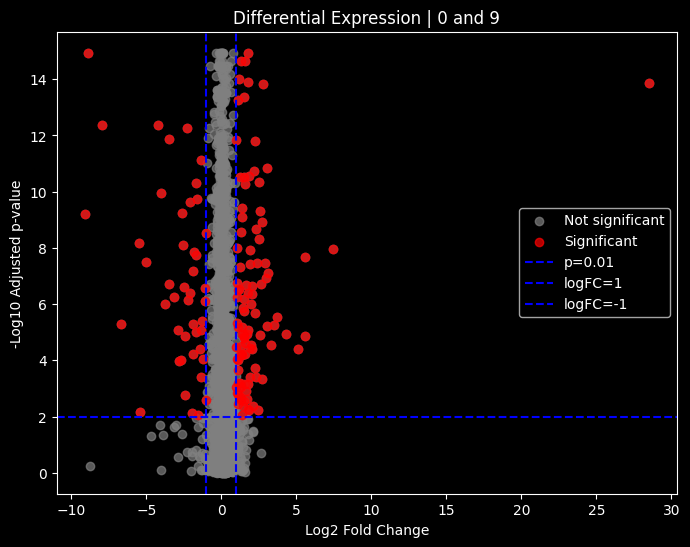

Query the results with:
"SELECT * FROM diff_expression WHERE group1='0' and group2='9'".


In [8]:
asql.plot_differential_expression(pvalue_threshold=0.01, logfc_threshold=1, group1="0", group2="9")

## Query the results from the diff_expression table

In [13]:
asql.query("SELECT * FROM diff_expression WHERE group1='0' and group2='9' and name='leiden_0_vs_9'")

,name,group1,group2,gene,tstat,logfc,df,pval,adj_pval
0,leiden_0_vs_9,0,9,n0610007P14Rik,9.085450,0.626459,233.578499,0.000000e+00,8.756260e-10
1,leiden_0_vs_9,0,9,n0610010F05Rik,1.918118,0.109200,238.122874,5.629211e-02,7.830868e-02
2,leiden_0_vs_9,0,9,n1110001J03Rik,-6.253281,-0.472151,231.805321,1.915299e-09,1.845523e-10
3,leiden_0_vs_9,0,9,n1110008F13Rik,-0.268244,-0.016895,247.469853,7.887353e-01,8.197332e-08
4,leiden_0_vs_9,0,9,n1110008P14Rik,3.425778,0.258434,244.577604,7.188917e-04,3.164319e-08
...,...,...,...,...,...,...,...,...,...
2495,leiden_0_vs_9,0,9,Zrsr2,-3.958356,-0.272130,230.565107,1.005430e-04,7.165040e-01
2496,leiden_0_vs_9,0,9,Zyg11b,2.307880,0.126168,221.508122,2.192866e-02,0.000000e+00
2497,leiden_0_vs_9,0,9,Zzef1,-1.241593,-0.111361,247.840197,2.155605e-01,6.358348e-06
2498,leiden_0_vs_9,0,9,l7Rn6,0.382926,0.033347,220.552533,7.021432e-01,1.506674e-01
